In [1]:
%pwd

'/content'

In [2]:
# /content/drive/MyDrive/archive.zip

In [3]:
!unzip -qq "/content/drive/MyDrive/archive.zip"

In [4]:
import numpy as np
import pandas as pd
import os
import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import Sequential, models
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
path = '/content/Face Mask Dataset/'
dataset = {
    "image_path": [],
    "mask_status": [],
    "where": []
}

for where in os.listdir(path):
  for status in os.listdir(path+"/"+where):
    for image in glob.glob(path+where+"/"+status+"/"+"*.png"):
      dataset["image_path"].append(image)
      dataset["mask_status"].append(status)
      dataset["where"].append(where)

dataset = pd.DataFrame(dataset)
dataset.head()

,image_path,mask_status,where
0,/content/Face Mask Dataset/Test/WithoutMask/55...,WithoutMask,Test
1,/content/Face Mask Dataset/Test/WithoutMask/35...,WithoutMask,Test
2,/content/Face Mask Dataset/Test/WithoutMask/29...,WithoutMask,Test
3,/content/Face Mask Dataset/Test/WithoutMask/26...,WithoutMask,Test
4,/content/Face Mask Dataset/Test/WithoutMask/45...,WithoutMask,Test


With Mask: 5909
Without Mask: 5883


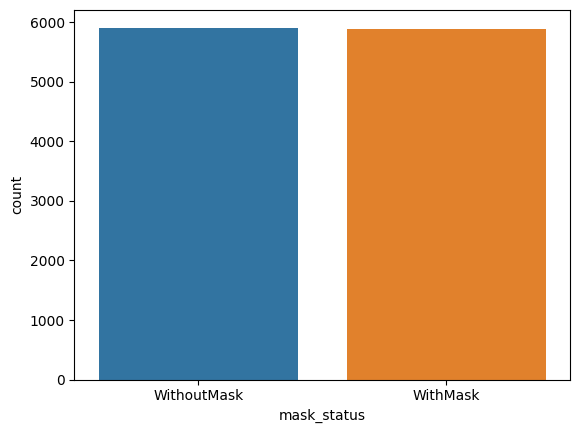

In [6]:
print(f"With Mask:", dataset.value_counts("mask_status")[0])
print(f"Without Mask:", dataset.value_counts("mask_status")[1])

sns.countplot(x = dataset["mask_status"]);

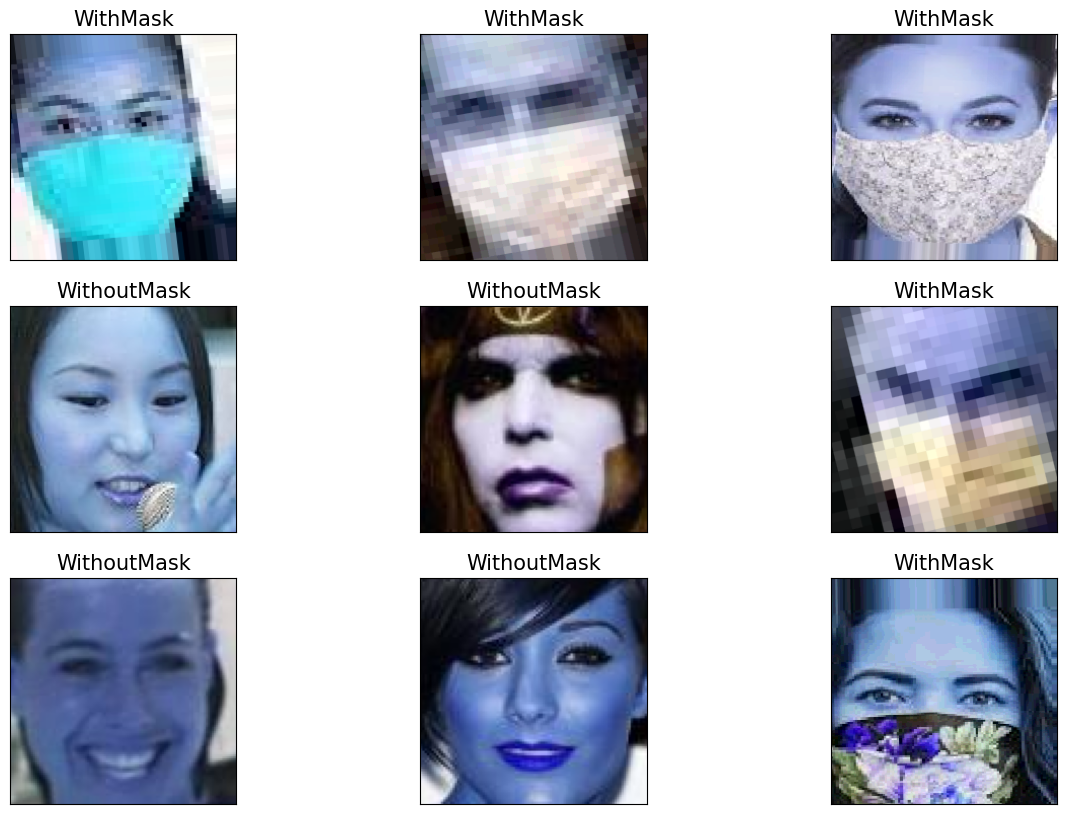

In [8]:
import cv2

plt.figure(figsize = (15, 10))

for i in range(9):
  random = np.random.randint(1, len(dataset))
  plt.subplot(3, 3, i+1)
  plt.imshow(cv2.imread(dataset.loc[random,"image_path"]))
  plt.title(dataset.loc[random,"mask_status"], size = 15)
  plt.xticks([])
  plt.yticks([])

plt.show()

In [9]:
train_df = dataset[dataset["where"] == "Train"]
test_df = dataset[dataset["where"] == "Test"]
valid_df = dataset[dataset["where"] == "Validation"]

print(train_df.head(10))

                                             image_path  mask_status  where
992   /content/Face Mask Dataset/Train/WithoutMask/4...  WithoutMask  Train
993   /content/Face Mask Dataset/Train/WithoutMask/3...  WithoutMask  Train
994   /content/Face Mask Dataset/Train/WithoutMask/3...  WithoutMask  Train
995   /content/Face Mask Dataset/Train/WithoutMask/5...  WithoutMask  Train
996   /content/Face Mask Dataset/Train/WithoutMask/5...  WithoutMask  Train
997   /content/Face Mask Dataset/Train/WithoutMask/1...  WithoutMask  Train
998   /content/Face Mask Dataset/Train/WithoutMask/1...  WithoutMask  Train
999   /content/Face Mask Dataset/Train/WithoutMask/3...  WithoutMask  Train
1000  /content/Face Mask Dataset/Train/WithoutMask/7...  WithoutMask  Train
1001  /content/Face Mask Dataset/Train/WithoutMask/9...  WithoutMask  Train


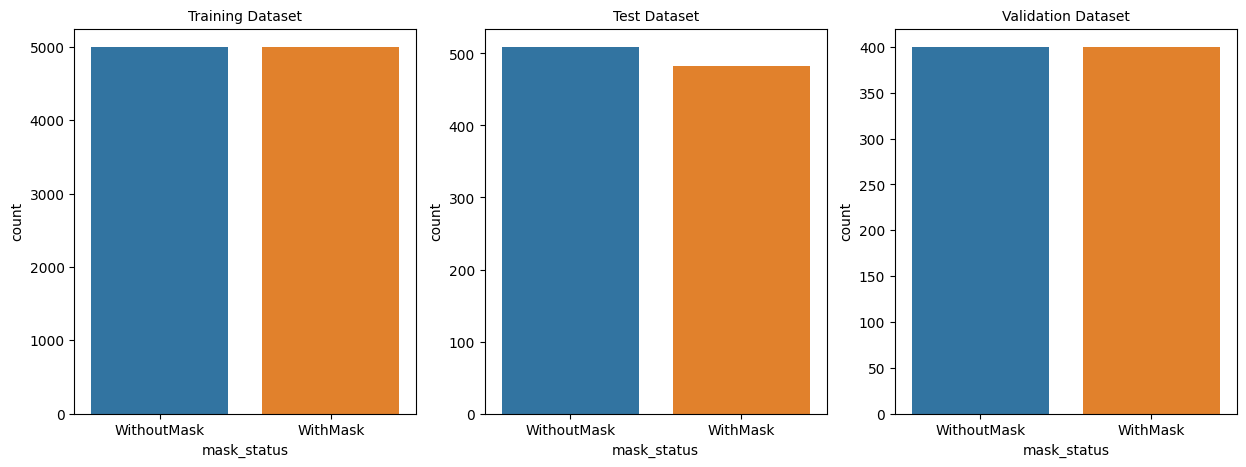

In [10]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
sns.countplot(x = train_df["mask_status"])
plt.title("Training Dataset", size = 10)

plt.subplot(1, 3, 2)
sns.countplot(x = test_df["mask_status"])
plt.title("Test Dataset", size = 10)

plt.subplot(1, 3, 3)
sns.countplot(x = valid_df["mask_status"])
plt.title("Validation Dataset", size = 10)

plt.show()

In [11]:
train_df = train_df.reset_index().drop("index", axis = 1)
train_df.head()

,image_path,mask_status,where
0,/content/Face Mask Dataset/Train/WithoutMask/4...,WithoutMask,Train
1,/content/Face Mask Dataset/Train/WithoutMask/3...,WithoutMask,Train
2,/content/Face Mask Dataset/Train/WithoutMask/3...,WithoutMask,Train
3,/content/Face Mask Dataset/Train/WithoutMask/5...,WithoutMask,Train
4,/content/Face Mask Dataset/Train/WithoutMask/5...,WithoutMask,Train


In [12]:
data = []
image_size = 150

for i in range(len(train_df)):
  ## Converting the image into grayscale
  img_array = cv2.imread(train_df["image_path"][i], cv2.IMREAD_GRAYSCALE)

  ## Resizing the array
  new_image_array = cv2.resize(img_array, (image_size, image_size))

  ## Encoding the image with the label
  if train_df["mask_status"][i] == "WithMask":
    data.append([new_image_array, 1])
  else:
    data.append([new_image_array, 0])

In [13]:
type(data)

list

In [14]:
data = np.array(data)
type(data)

<ipython-input-14-2657eb8d4193>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(data)


numpy.ndarray

In [15]:
np.random.shuffle(data)

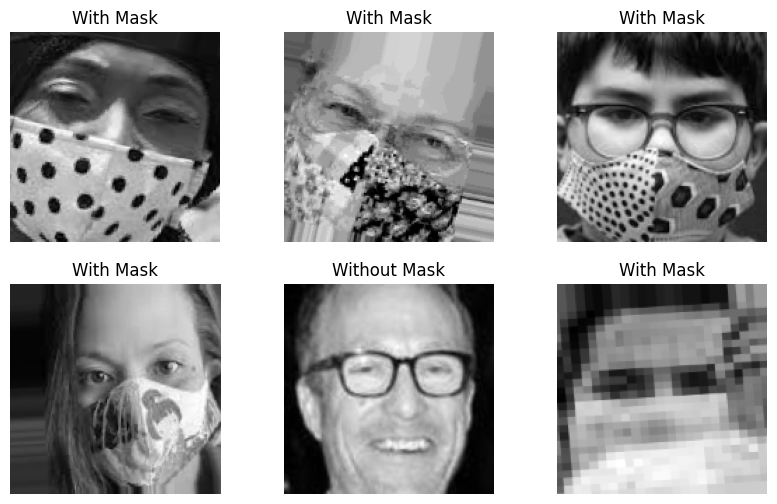

In [16]:
fig, ax = plt.subplots(2, 3, figsize=(10, 6))

for row in range(2):
  for col in range(3):
    image_index = row*100+col

    ax[row, col].axis("off")
    ax[row, col].imshow(data[image_index][0], cmap = "gray")

    if data[image_index][1] == 0:
      ax[row, col].set_title("Without Mask")
    else:
      ax[row, col].set_title("With Mask")

plt.show()

In [17]:
data[0]

array([array([[ 27,  27,  36, ...,  16,  16,  16],
              [ 30,  31,  41, ...,  16,  16,  16],
              [ 38,  39,  41, ...,  16,  16,  16],
              ...,
              [ 54,  56,  54, ..., 189, 190, 190],
              [ 53,  53,  51, ..., 174, 177, 180],
              [ 53,  52,  52, ..., 174, 174, 174]], dtype=uint8), 1],
      dtype=object)

In [18]:
X = []
y = []

for image in data:
  X.append(image[0])
  y.append(image[1])

X = np.array(X)
y = np.array(y)

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size = 0.2,
                                                  random_state = 13)

In [20]:
from tensorflow.keras import layers, models

model = models.Sequential([
                            layers.Conv2D(32, kernel_size=(5,5), strides=(1,1),
                                          padding='same', activation='relu',
                                          input_shape=(150,150,1)),
                            layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
                            layers.Conv2D(64, (2,2), activation='relu', padding='same'),
                            layers.MaxPooling2D(pool_size=(2,2)),
                            layers.Dropout(0.25),
                            layers.Flatten(),
                            layers.Dense(1000, activation='relu'),
                            layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 37, 37, 64)        0         
                                                                 
 flatten (Flatten)           (None, 87616)             0

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [24]:
X_train = X_train.reshape(len(X_train), X_train.shape[1], X_train.shape[2], 1)
X_val = X_val.reshape(len(X_val), X_val.shape[1], X_val.shape[2], 1)

history = model.fit(X_train, y_train, epochs=5, batch_size = 32)

Epoch 1/5
250/250 [==============================] - 11s 40ms/step - loss: 0.3664 - accuracy: 0.8891
Epoch 2/5
250/250 [==============================] - 10s 40ms/step - loss: 0.3591 - accuracy: 0.8630
Epoch 3/5
250/250 [==============================] - 10s 40ms/step - loss: 0.1546 - accuracy: 0.9463
Epoch 4/5
250/250 [==============================] - 10s 40ms/step - loss: 0.0614 - accuracy: 0.9780
Epoch 5/5
250/250 [==============================] - 10s 40ms/step - loss: 0.0381 - accuracy: 0.9870


In [25]:
model.evaluate(X_val, y_val)

63/63 [==============================] - 1s 11ms/step - loss: 0.1560 - accuracy: 0.9610


[0.1560460776090622, 0.9610000252723694]

In [32]:
prediction = np.argmax(model.predict(X_val), axis=1)

print(classification_report(y_val, prediction))
print(confusion_matrix(y_val, prediction))

63/63 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1009
           1       0.00      0.00      0.00       991

    accuracy                           0.50      2000
   macro avg       0.25      0.50      0.34      2000
weighted avg       0.25      0.50      0.34      2000

[[1009    0]
 [ 991    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
model2 = models.Sequential([
                            layers.Conv2D(32, kernel_size=(5,5), strides=(1,1),
                                          padding='same', activation='relu',
                                          input_shape=(150,150,1)),
                            layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
                            layers.Conv2D(64, (2,2), activation='relu', padding='same'),
                            layers.MaxPooling2D(pool_size=(2,2)),
                            layers.Dropout(0.25),
                            layers.Flatten(),
                            layers.Dense(1000, activation='relu'),
                            layers.Dense(1, activation='sigmoid')
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 150, 150, 32)      832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        8256      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 87616)            

In [34]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [35]:
X = []
y = []

for image in data:
  X.append(image[0])
  y.append(image[1])

X = np.array(X)
y = np.array(y)

X = X/255

X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size = 0.2,
                                                  random_state = 13)

X_train = X_train.reshape(len(X_train), X_train.shape[1], X_train.shape[2], 1)
X_val = X_val.reshape(len(X_val), X_val.shape[1], X_val.shape[2], 1)

history = model2.fit(X_train, y_train, epochs=5, batch_size = 32)

Epoch 1/5
250/250 [==============================] - 14s 48ms/step - loss: 0.4381 - accuracy: 0.8479
Epoch 2/5
250/250 [==============================] - 11s 43ms/step - loss: 0.0954 - accuracy: 0.9639
Epoch 3/5
250/250 [==============================] - 11s 42ms/step - loss: 0.0647 - accuracy: 0.9764
Epoch 4/5
250/250 [==============================] - 11s 45ms/step - loss: 0.0536 - accuracy: 0.9810
Epoch 5/5
250/250 [==============================] - 11s 43ms/step - loss: 0.0355 - accuracy: 0.9883


In [36]:
model2.evaluate(X_val, y_val)

63/63 [==============================] - 1s 8ms/step - loss: 0.0617 - accuracy: 0.9790


[0.061745379120111465, 0.9789999723434448]

In [37]:
prediction = np.argmax(model2.predict(X_val), axis=1)

print(classification_report(y_val, prediction))
print(confusion_matrix(y_val, prediction))

63/63 [==============================] - 1s 7ms/step
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      1009
           1       0.00      0.00      0.00       991

    accuracy                           0.50      2000
   macro avg       0.25      0.50      0.34      2000
weighted avg       0.25      0.50      0.34      2000

[[1009    0]
 [ 991    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
wrong_result = []

for n in range(0, len(y_val)):
  if prediction[n] != y_val[n]:
    wrong_result.append(n)

len(wrong_result)

991

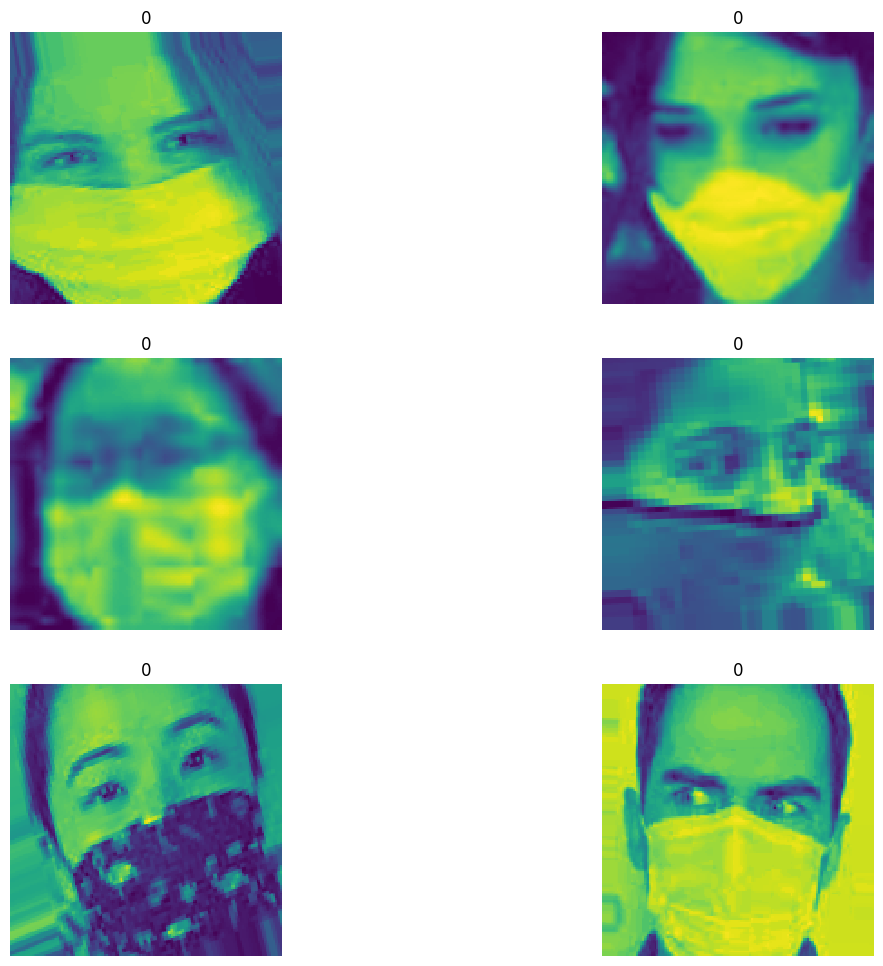

In [39]:
import random

samples = random.choices(population=wrong_result, k=6)

plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
  plt.subplot(3, 2, idx+1)
  plt.imshow(X_val[n].reshape(150,150), interpolation='nearest')
  plt.title(prediction[n])
  plt.axis('off')

plt.show()